## Why does late grain-fill start lead to high dispersion?

In [1]:
import os
import collections
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.sequential import GnBu_8
from palettable.colorbrewer.sequential import YlGn_9
from palettable.colorbrewer.sequential import OrRd_6

from ideotype.analysis import  rank_all_phenos, rank_top_phenos
from ideotype.data_process import read_data, parse_mature, agg_sims
from ideotype import DATA_PATH

In [6]:
# Read in data etc.
run_name = 'present'
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_extended, df_stuck = parse_mature(df_all)
df_all.drop(df_stuck.index, inplace=True)

In [7]:
# Rank phenotypes
df_rankings, phenos_ranked = rank_all_phenos(run_name=run_name, n_pheno=100,
                                             w_yield=1, w_disp=1)

# Queried maizsim outputs
df_sims = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_yield.csv'))
df_phys = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_phys.csv'))
df_carbon = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_carbon.csv'))
df_mass = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_mass.csv'))
df_leaves = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_leaves.csv'))
df_waterdeficit = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit.csv'))
df_waterdeficit_sum = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterdeficit_sum.csv'))
df_waterpotential = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_waterpotential.csv'))
df_phenology = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_pheno.csv'))
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
df_gseason_climate = pd.read_csv(os.path.join(DATA_PATH, 'sims', f'sims_{run_name}_gseason_climate.csv'))

In [8]:
df = df_all
groups = ['cvar', 'site']
sim = 'dm_ear'

mx_mean = agg_sims(df, groups, 'mean', sim)
mx_variance = agg_sims(df, groups, 'variance', sim)
mx_disp = np.divide(mx_variance, mx_mean)

df_mean = pd.DataFrame(mx_mean)
df_disp = pd.DataFrame(mx_disp)

Text(0, 0.5, 'yield of all sites')

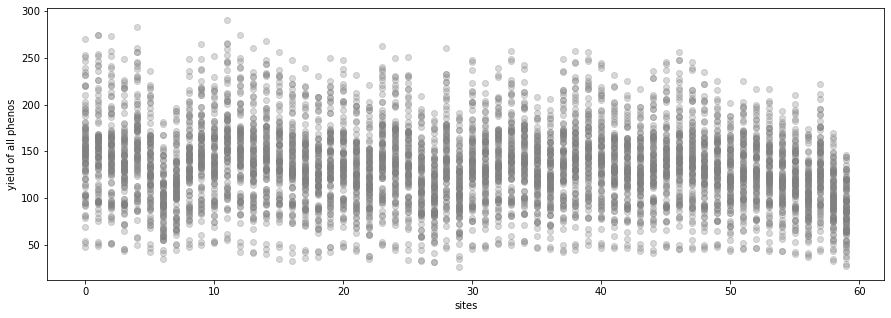

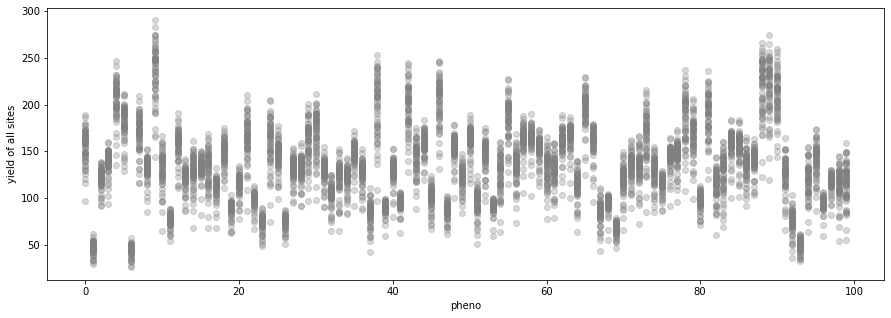

In [9]:
plt.figure(figsize=(15,5))
for item in np.arange(60):
    plt.scatter([item]*100, mx_mean[:,item], color='grey', alpha=0.3)
plt.xlabel('sites')
plt.ylabel('yield of all phenos')

plt.figure(figsize=(15,5))
for item in np.arange(100):
    plt.scatter([item]*60, mx_mean[item,:], color='grey', alpha=0.3)
plt.xlabel('pheno')
plt.ylabel('yield of all sites')

Text(0, 0.5, 'site dispersions')

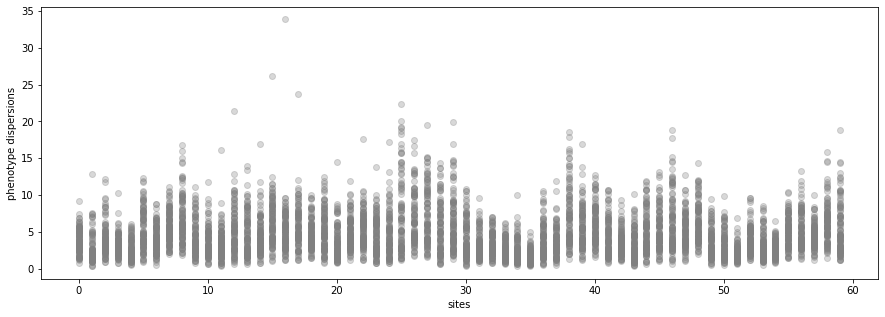

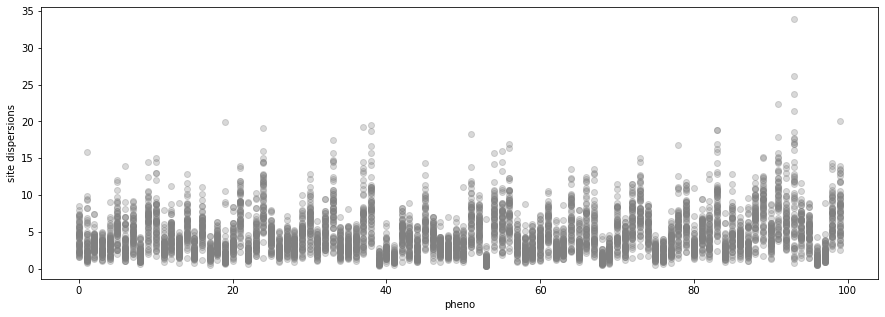

In [211]:
plt.figure(figsize=(15,5))
for item in np.arange(60):
    plt.scatter([item]*100, mx_disp[:,item], color='grey', alpha=0.3)
plt.xlabel('sites')
plt.ylabel('phenotype dispersions')

plt.figure(figsize=(15,5))
for item in np.arange(100):
    plt.scatter([item]*60, mx_disp[item,:], color='grey', alpha=0.3)
plt.xlabel('pheno')
plt.ylabel('site dispersions')

Text(0, 0.5, 'phenotype dispersions')

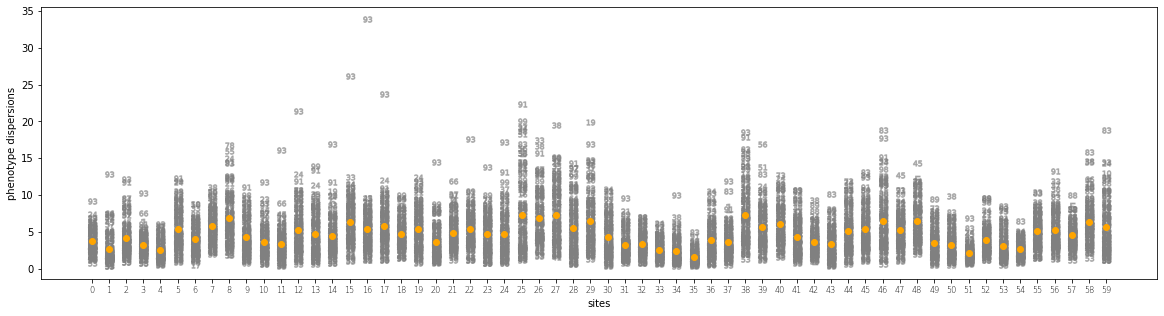

In [254]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

for pheno in np.arange(100):
    ax.scatter(np.arange(60), [mx_disp[pheno,site] for site in np.arange(60)],
                color='grey', marker=f'${pheno}$', alpha=0.5, s=80)
ax.scatter(np.arange(60), df_disp.mean(axis=0), color='orange')
ax.set_xticks(np.arange(60))
ax.set_xticklabels(np.arange(60), fontweight='light', fontsize=8)

plt.xlabel('sites')
plt.ylabel('phenotype dispersions')


Text(0, 0.5, 'site dispersions')

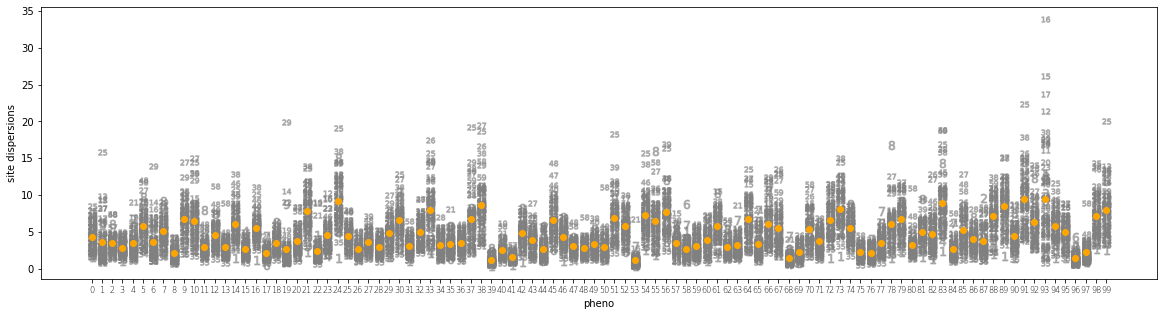

In [255]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

for site in np.arange(60):
    ax.scatter(np.arange(100), [mx_disp[pheno,site] for pheno in np.arange(100)], 
               color='grey', marker=f'${site}$', alpha=0.5, s=80)
ax.scatter(np.arange(100), df_disp.mean(axis=1), color='orange')
ax.set_xticks(np.arange(100))
ax.set_xticklabels(np.arange(100), fontweight='light', fontsize=8)

plt.xlabel('pheno')
plt.ylabel('site dispersions')

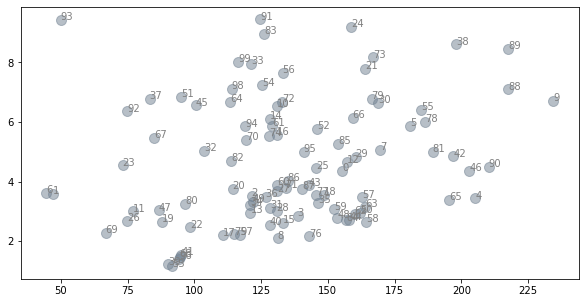

In [78]:
df = df_all
groups = ['cvar', 'site']
sim = 'dm_ear'

mx_mean = agg_sims(df, groups, 'mean', sim)
mx_variance = agg_sims(df, groups, 'variance', sim)
mx_disp = np.divide(mx_variance, mx_mean)
means = df_mean.mean(axis=1)
disps = df_disp.mean(axis=1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
sc = ax.scatter(means, disps, c='slategrey', s=100, alpha=0.5)
for item in np.arange(100):
    ax.annotate(item, (means[item], disps[item]), c='grey')


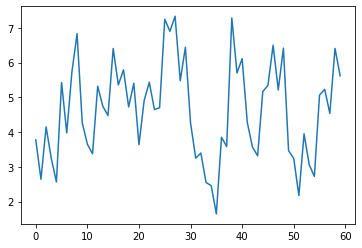

In [64]:
disps = df_disp.mean(axis=0)
plt.plot(disps)

<BarContainer object of 100 artists>

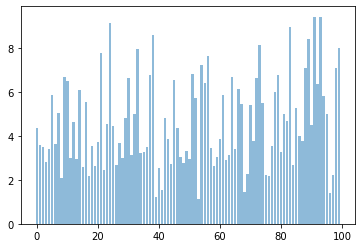

In [68]:
disps = df_disp.mean(axis=1)
plt.bar(np.arange(len(disps)), disps, alpha=0.5)

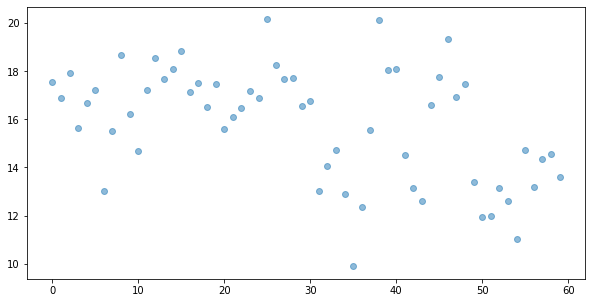

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(np.arange(60), [variance/mean for variance, mean in zip(variances, means)], alpha=0.5)

In [5]:
sites = df_sites.site.astype(int)

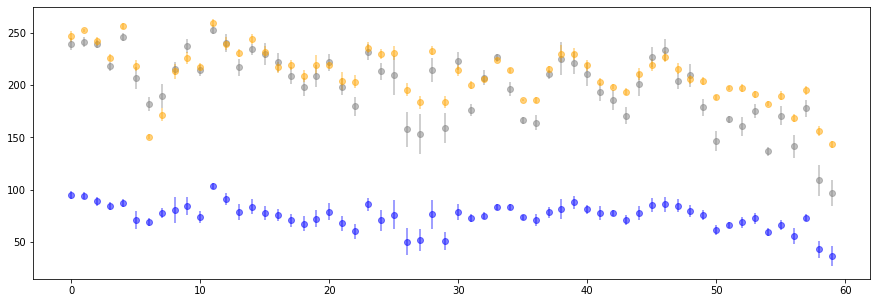

In [6]:
plt.figure(figsize=(15,5))
pheno = 38
for item in np.arange(60):
    ears = df_all.query(f"site=='{sites[item]}'").query(f'cvar=={pheno}')['dm_ear']
    disp = ears.var()/ears.mean()
    plt.errorbar(item, ears.mean(), yerr=disp, color='grey', fmt='o', alpha=0.5)

pheno = 90
for item in np.arange(60):
    ears = df_all.query(f"site=='{sites[item]}'").query(f'cvar=={pheno}')['dm_ear']
    disp = ears.var()/ears.mean()
    plt.errorbar(item, ears.mean(), yerr=disp, color='orange', fmt='o', alpha=0.5)
    
pheno = 92
for item in np.arange(60):
    ears = df_all.query(f"site=='{sites[item]}'").query(f'cvar=={pheno}')['dm_ear']
    disp = ears.var()/ears.mean()
    plt.errorbar(item, ears.mean(), yerr=disp, color='blue', fmt='o', alpha=0.5)

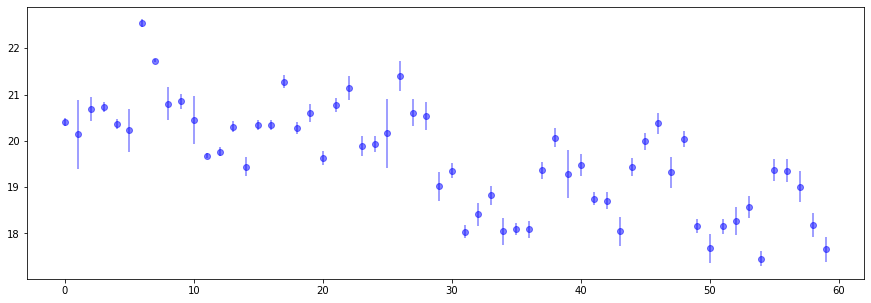

In [7]:
df_gseason_climate_grouped = df_gseason_climate.groupby(['site','year']).mean()

plt.figure(figsize=(15,5))
for item, site in enumerate(sites):
    temps = df_gseason_climate_grouped.loc[(site)]['temp_air']
    temp_mean = temps.mean()
    temp_sd = temps.var()/np.sqrt(len(temps))
    plt.errorbar(item, temp_mean, yerr=temp_sd, color='blue', fmt='o', alpha=0.5)

Text(0.5, 1.0, 'season mean temp')

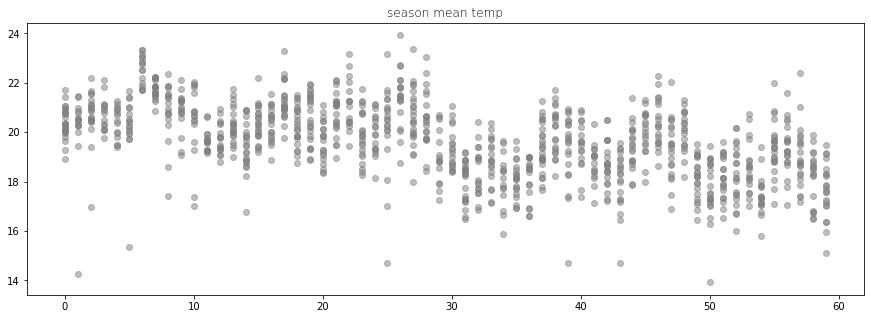

In [8]:
df_gseason_climate_grouped = df_gseason_climate.groupby(['site','year']).mean()

plt.figure(figsize=(15,5))
for item, site in enumerate(sites):
    temps = df_gseason_climate_grouped.loc[(site)]['temp_air']
    temp_mean = temps.mean()
    temp_var = temps.var()
    plt.scatter([item]*len(temps), temps, color='grey', alpha=0.5)
plt.title('season mean temp', fontweight='light')

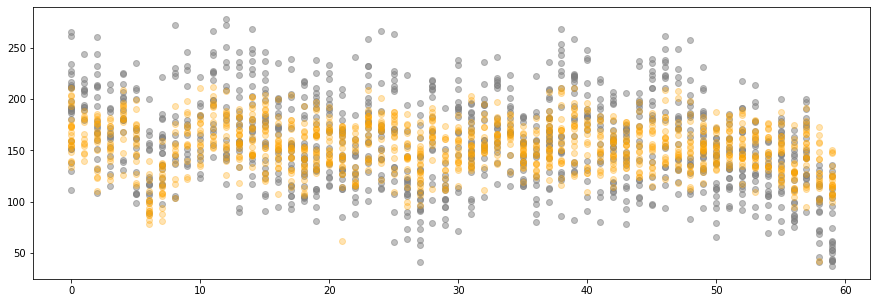

In [10]:
pheno=24
plt.figure(figsize=(15,5))
for item in np.arange(60):
    ears = df_all.query(f"site=='{sites[item]}'").query(f'cvar=={pheno}')['dm_ear']
    plt.scatter([item]*len(ears), ears, color='grey', alpha=0.5)

#pheno=12
#for item in np.arange(60):
#    ears = df_all.query(f"site=='{sites[item]}'").query(f'cvar=={pheno}')['dm_ear']
#    plt.scatter([item]*len(ears), ears, color='blue', alpha=0.3)

pheno=48
for item in np.arange(60):
    ears = df_all.query(f"site=='{sites[item]}'").query(f'cvar=={pheno}')['dm_ear']
    plt.scatter([item]*len(ears), ears, color='orange', alpha=0.3)


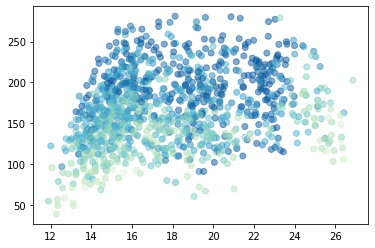

In [331]:
pheno = 
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.temp, df.dm_ear, c=df.precip,
            cmap=GnBu_8.mpl_colormap, alpha=0.5,
            vmin=100, vmax=800)

#pheno = 48
#df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
#df = df_ear_pheno.merge(df_wea, on=['site','year'])
#plt.scatter(df.temp, df.dm_ear, color='orange', alpha=0.3)

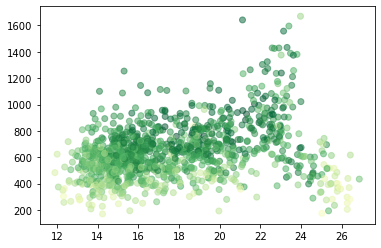

In [359]:
pheno = 4
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.temp, df.precip, c=df.dm_ear,
            cmap=YlGn_9.mpl_colormap, alpha=0.5)

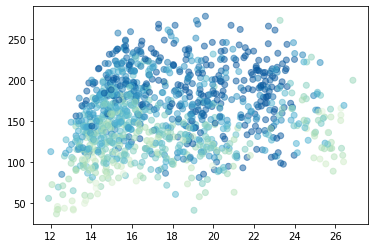

In [323]:
pheno = 24
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.temp, df.dm_ear, c=df.precip, 
            cmap=GnBu_8.mpl_colormap, alpha=0.5,
            vmin=100, vmax=800)

Text(0.5, 1.0, '38')

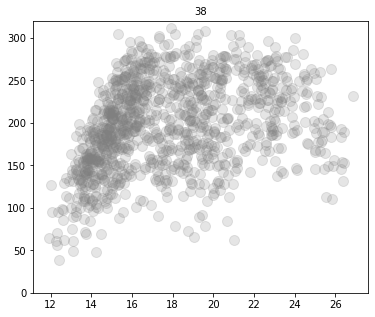

In [266]:
phenos = [38]

fig = plt.figure(figsize=(6,5))
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
ax = fig.add_subplot(1,1,1)
ax.scatter(df.temp, df.dm_ear, 
           s=100, c='grey', alpha=0.2)
ax.set_ylim(0,320)
ax.set_title(pheno, fontsize=10)

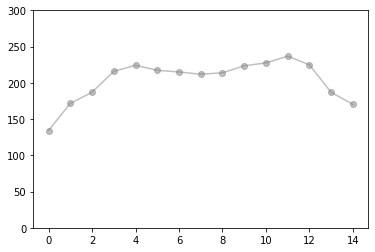

In [155]:
phenos = [81]
#phenos = [38,24,82,14,10,94,56,32,54,33,64,
#          98,99,83,91,51,67,69,23,37,92,1,93]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 15
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    
    plt.plot(np.arange(n_bins).tolist(), upper_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)

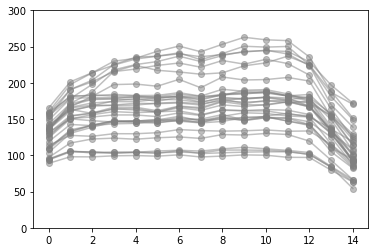

In [52]:
phenos = [4,65,46,90,50,62,58,63,84,44,57,48,
          42,59,81,76,35,18,77,7,3,8,15,40,
          28,31,27,97,17,41,68,96,39]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 15
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    
    plt.plot(np.arange(n_bins).tolist(), upper_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)

In [ ]:
phenos = [38,65]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 10
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    plt.fill_between(np.arange(n_bins).tolist(), upper_yield, lower_yield, alpha=0.2)
    plt.plot(np.arange(n_bins).tolist(), mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)


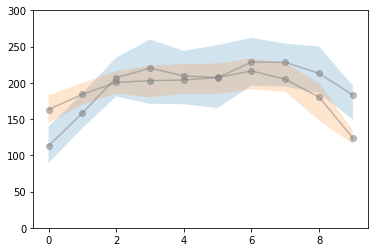

In [101]:
phenos = [38,65]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 10
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    plt.fill_between(np.arange(n_bins).tolist(), upper_yield, lower_yield, alpha=0.2)
    plt.plot(np.arange(n_bins).tolist(), mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)


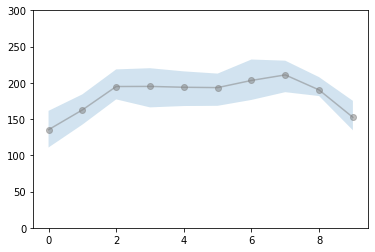

In [157]:
phenos = [81]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 10
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    plt.fill_between(np.arange(n_bins).tolist(), upper_yield, lower_yield, alpha=0.2)
    plt.plot(np.arange(n_bins).tolist(), mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)

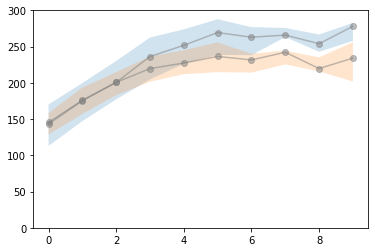

In [117]:
phenos = [88,4]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 10
    bins = pd.cut(df.precip, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    plt.fill_between(np.arange(n_bins).tolist(), upper_yield, lower_yield, alpha=0.2)
    plt.plot(np.arange(n_bins).tolist(), mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)

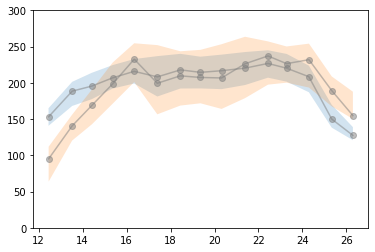

In [160]:
phenos = [4, 38]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 15
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    temp_bins = df.groupby('bins').mean().temp
    plt.fill_between(temp_bins, upper_yield, lower_yield, alpha=0.2)
    plt.plot(temp_bins, mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)


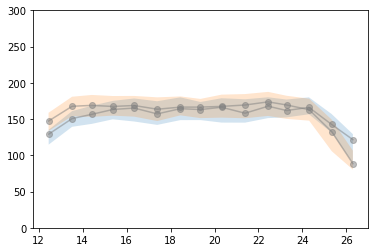

In [161]:
phenos = [44, 58]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 15
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    temp_bins = df.groupby('bins').mean().temp
    plt.fill_between(temp_bins, upper_yield, lower_yield, alpha=0.2)
    plt.plot(temp_bins, mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)


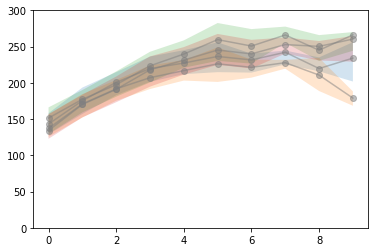

In [130]:
phenos = [4,65,90,46]
#phenos=[65]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 10
    bins = pd.cut(df.precip, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    plt.fill_between(np.arange(n_bins).tolist(), upper_yield, lower_yield, alpha=0.2)
    plt.plot(np.arange(n_bins).tolist(), mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)


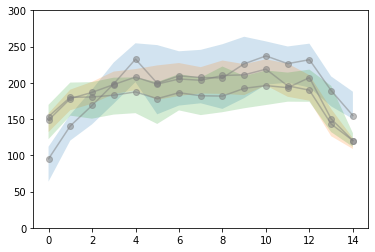

In [131]:
phenos = [38, 65, 5]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 15
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    plt.fill_between(np.arange(n_bins).tolist(), upper_yield, lower_yield, alpha=0.2)
    plt.plot(np.arange(n_bins).tolist(), mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)


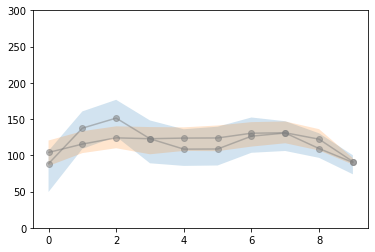

In [41]:
phenos = [83, 49]

for pheno in phenos:
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    n_bins = 10
    bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
    df['bins'] = bins
    upper_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 75),2) for item in np.arange(n_bins)]
    mid_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 50),2) for item in np.arange(n_bins)]
    lower_yield = [round(np.percentile(df.query(f'bins=={item}').dm_ear, 25),2) for item in np.arange(n_bins)]
    plt.fill_between(np.arange(n_bins).tolist(), upper_yield, lower_yield, alpha=0.2)
    plt.plot(np.arange(n_bins).tolist(), mid_yield, '-o', color='grey', alpha=0.5)
    plt.ylim(0,300)


In [292]:
n_bins = 10
bins = pd.cut(df.temp, n_bins, labels=np.arange(n_bins).tolist())
df['bins'] = bins

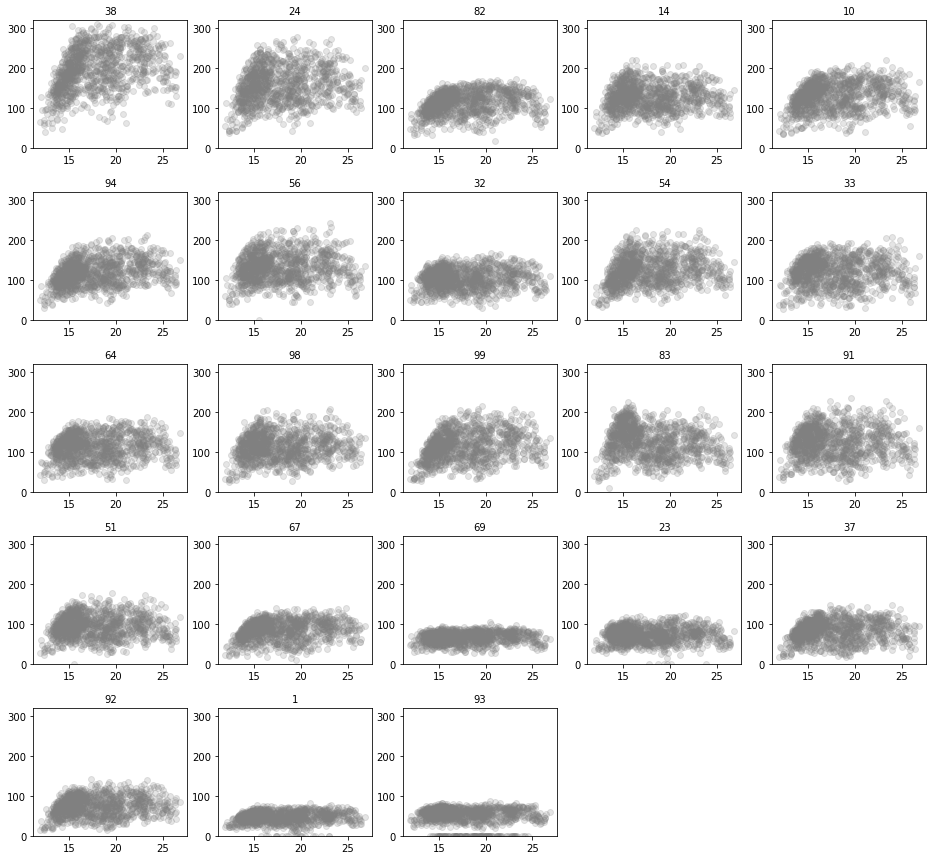

In [23]:
phenos = [38,24,82,14,10,94,56,32,54,33,64,
          98,99,83,91,51,67,69,23,37,92,1,93]

fig = plt.figure(figsize=(16,15))

for count, pheno in enumerate(phenos):
    ax = fig.add_subplot(5,5,count+1)
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    ax.scatter(df.temp, df.dm_ear, 
               c='grey', 
               cmap=GnBu_8.mpl_colormap,
               vmin=300, vmax=800,
               alpha=0.2)
               #c='grey', alpha=0.2)
    ax.set_ylim(0,320)
    ax.set_title(pheno, fontsize=10)

fig.subplots_adjust(hspace=0.35)

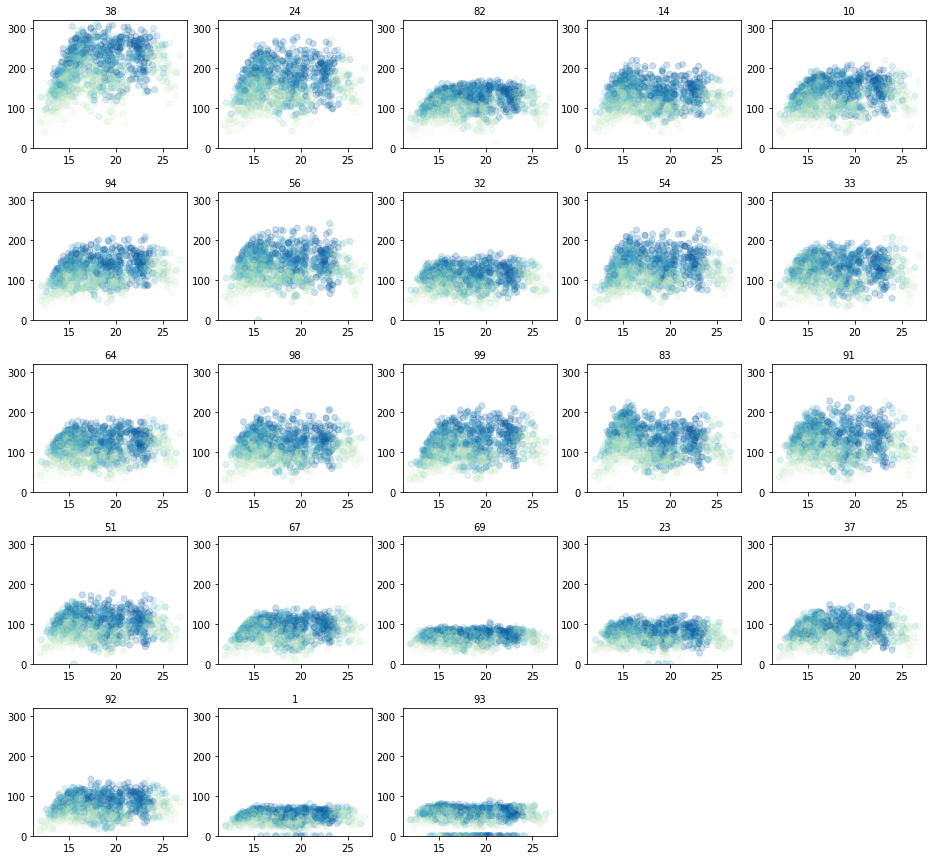

In [21]:
phenos = [38,24,82,14,10,94,56,32,54,33,64,
          98,99,83,91,51,67,69,23,37,92,1,93]

fig = plt.figure(figsize=(16,15))

for count, pheno in enumerate(phenos):
    ax = fig.add_subplot(5,5,count+1)
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    ax.scatter(df.temp, df.dm_ear, 
               c=df.precip, 
               cmap=GnBu_8.mpl_colormap,
               vmin=300, vmax=800,
               alpha=0.2)
               #c='grey', alpha=0.2)
    ax.set_ylim(0,320)
    ax.set_title(pheno, fontsize=10)

fig.subplots_adjust(hspace=0.35)

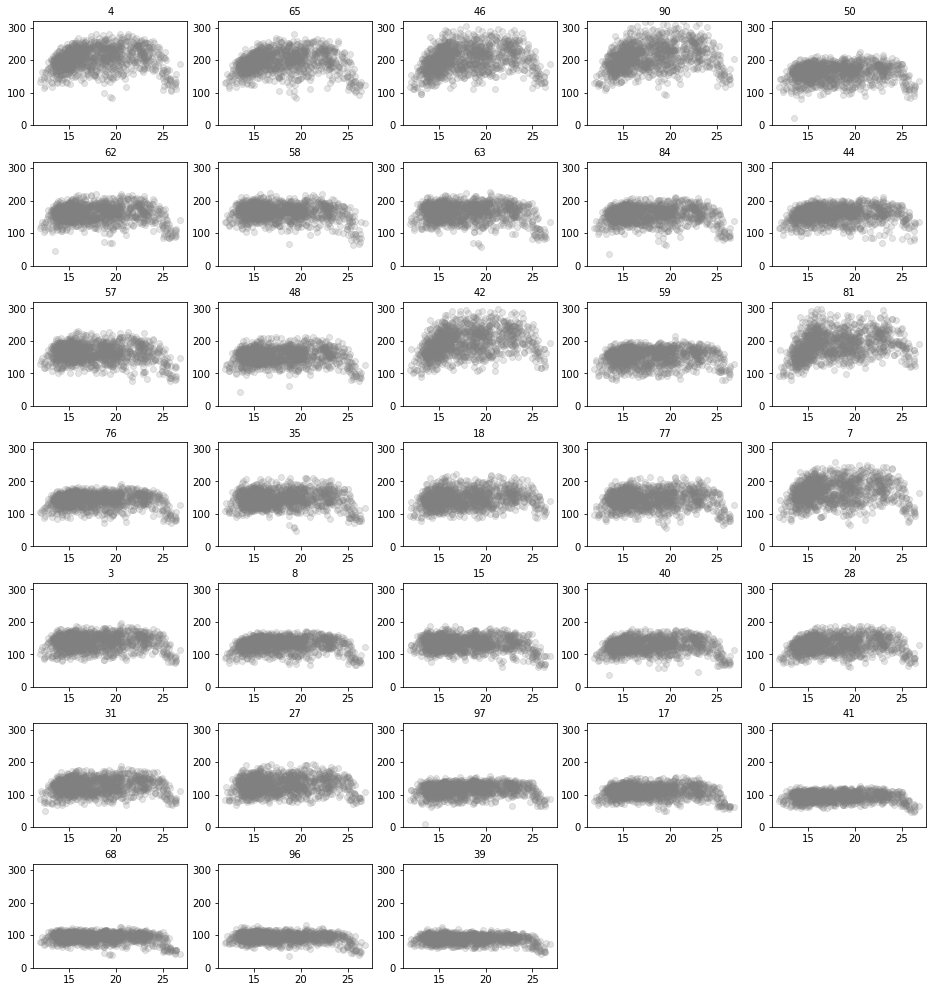

In [24]:
phenos = [4,65,46,90,50,62,58,63,84,44,57,48,
          42,59,81,76,35,18,77,7,3,8,15,40,
          28,31,27,97,17,41,68,96,39]

fig = plt.figure(figsize=(16,20))

for count, pheno in enumerate(phenos):
    ax = fig.add_subplot(8,5,count+1)
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    ax.scatter(df.temp, df.dm_ear, 
               c='grey', alpha=0.2)
#               c='grey', alpha=0.2)
    ax.set_ylim(0,320)
    ax.set_title(pheno, fontsize=10)

fig.subplots_adjust(hspace=0.35)

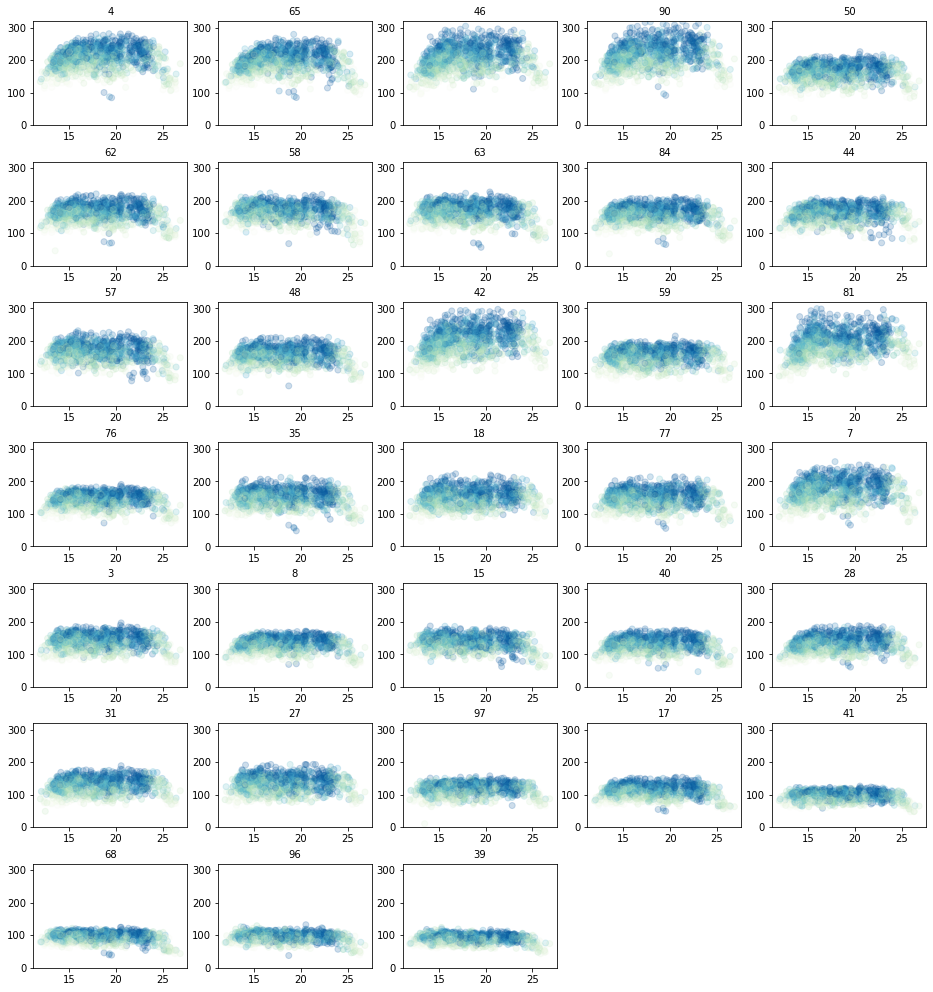

In [22]:
phenos = [4,65,46,90,50,62,58,63,84,44,57,48,
          42,59,81,76,35,18,77,7,3,8,15,40,
          28,31,27,97,17,41,68,96,39]

fig = plt.figure(figsize=(16,20))

for count, pheno in enumerate(phenos):
    ax = fig.add_subplot(8,5,count+1)
    df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
    df = df_ear_pheno.merge(df_wea, on=['site','year'])
    ax.scatter(df.temp, df.dm_ear, 
               c=df.precip, 
               cmap=GnBu_8.mpl_colormap,
               vmin=300, vmax=800,
               alpha=0.2)
#               c='grey', alpha=0.2)
    ax.set_ylim(0,320)
    ax.set_title(pheno, fontsize=10)

fig.subplots_adjust(hspace=0.35)

In [ ]:
pheno = 37
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.temp, df.dm_ear, c='grey', alpha=0.5)

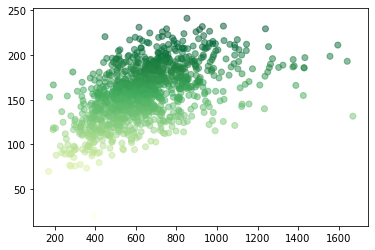

In [309]:
pheno = 12
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.precip, df.dm_ear, c=df.dm_ear, 
            cmap=YlGn_9.mpl_colormap, alpha=0.5)

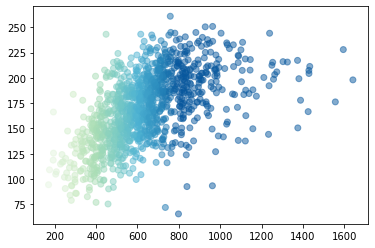

In [315]:
pheno = 7
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.precip, df.dm_ear, c=df.precip, 
            cmap=GnBu_8.mpl_colormap, alpha=0.5,
            vmin=100, vmax=800)

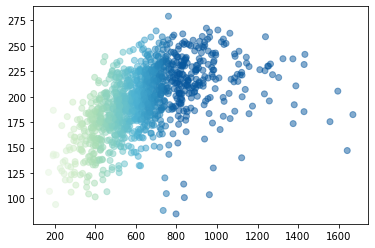

In [321]:
pheno = 65
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.precip, df.dm_ear, c=df.precip, 
            cmap=GnBu_8.mpl_colormap, alpha=0.5,
            vmin=100, vmax=800)

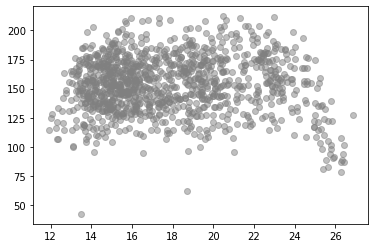

In [238]:
pheno = 48
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.temp, df.dm_ear, color='grey', alpha=0.5)

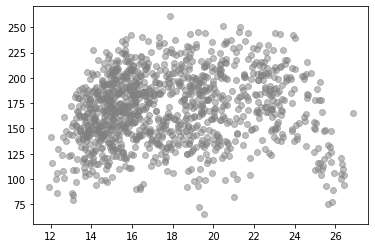

In [246]:
pheno = 7
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.temp, df.dm_ear, color='grey', alpha=0.5)

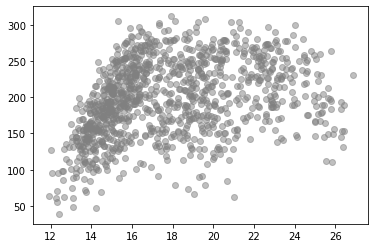

In [252]:
pheno = 38
df_ear_pheno = df_all.query(f'cvar=={pheno}')[['year', 'site', 'dm_ear']]
df = df_ear_pheno.merge(df_wea, on=['site','year'])
plt.scatter(df.temp, df.dm_ear, color='grey', alpha=0.5)